# Transformations of Space

We now make the jump from two to three dimensions. We generalize every notion we saw in the previous notebook, and consider several new ones. Our chief goal is the construction of rotation matrices. 

## Vectors and Orientation

We begin with the illustration of a vector $a=(a_x,a_y,a_z)$ in space with respect to a given right-handed orthogonal coordinate system $(e_x,e_y,e_z)$. **Orthogonal** means that the vectors are mutually perpendicular, while **right-handed** means that if, with your right hand, you align your index finger with $e_x$ and your middle finger with $e_y$ then your thumb will align with $e_z$.

We introduce the **spherical coordinates**

\begin{equation}\label{eq:scon}
  \eqalign{
  \theta &= \hbox{ polar angle } = \angle(e_z,a), \hskip 0.5in 0\le\theta<\pi \cr
  \phi &= \hbox{ azimuthal angle } = \angle(e_x,a^{\flat}), \hskip 0.5in 0\le\phi<2\pi \cr
  r &= \hbox{ magnitude } = \|a\| = \sqrt{a_x^2+a_y^2+a_z^2}, \cr}
\end{equation}

where $a^{\flat}=(a_x,a_y,0)$ is the flattening of $a$ into the $(e_x,e_y)$ plane. In these coordinates, our $a$ vector is expressed as

\begin{equation}\label{eq:ascon}
  \eqalign{
  a_x &= r\sin(\theta)\cos(\phi) \cr
  a_y &= r\sin(\theta)\sin(\phi) \cr
  a_z &= r\cos(\theta) \cr}
\end{equation}

and illustrated in Figure \ref{fig:ascon}.

<IPython.core.display.Javascript object>


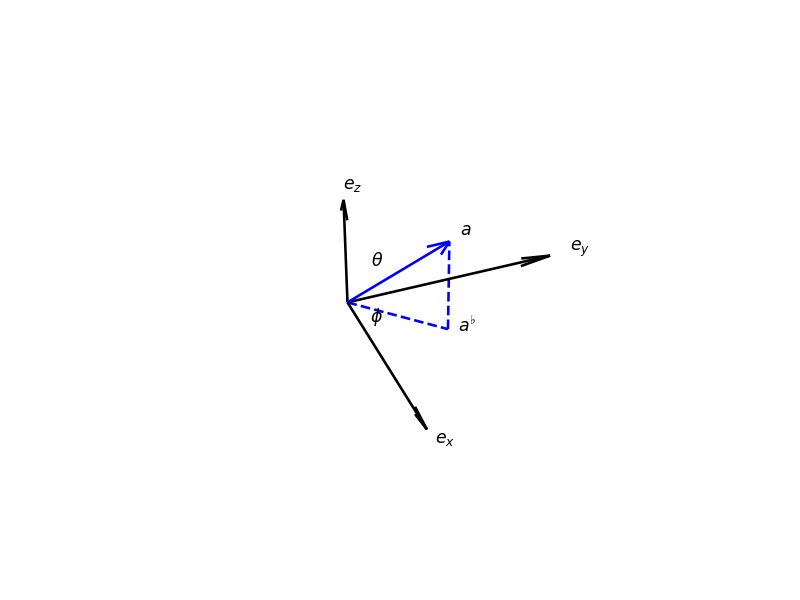

In [2]:
# spherical coordinates
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

theta = np.pi/6
phi = np.pi/4
r = 2
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

ax.quiver(0,0,0,x,y,z, colors='b', arrow_length_ratio=.15)
ax.text3D(1.1*x, 1.1*y, 1.1*z, '$a$')

ex = np.array([2,0,0])
ey = np.array([0,2,0])
ez = np.array([0,0,2])
ax.quiver([0,0,0],[0,0,0],[0,0,0],ex,ey,ez, colors='k', arrow_length_ratio=.15)

tex = 1.1*ex
ax.text3D(tex[0], tex[1], tex[2], '$e_x$')
tey = 1.1*ey
ax.text3D(tey[0], tey[1], tey[2], '$e_y$')
tez = 1.1*ez
ax.text3D(tez[0], tez[1], tez[2], '$e_z$')

ax.plot3D([0, x], [0, y], [0,0], 'b--')
ax.text3D(1.1*x, 1.1*y, 0, '$a^{\\flat}$')
ax.plot3D([x, x], [y, y], [0,z], 'b--')

ax.text3D(x/4, y/4, z/2, '$\\theta$')
ax.text3D(x/2, y/8, 0, '$\phi$')

ax.set_xlim(-1,2)
ax.set_ylim(-1,2)
ax.set_zlim(-1,2)

ax.axis('off');

\begin{myfig}\label{fig:ascon} Representation of $a\in\maR^3$ in terms of its **polar angle**, $\theta$, **azimuthal angle**, $\phi$, and **magnitude**, $r$. Please rotate, zoom, and repeat. \end{myfig}

## Inner, outer, and cross products

To begin we note the **inner product** of two space vectors remains the sum of their element-wise products. That is

\begin{equation*}
  a^Tb = \begin{bmatrix} a[0] & a[1] & a[2] \end{bmatrix}\begin{bmatrix} a[0] \\ a[1] \\ a[2] \end{bmatrix}
    = a[0]b[0] + a[1]b[1] + a[2]b[2].
\end{equation*}

In addition, the norm of $a$ remains $\|a\|\equiv (a^Ta)^{1/2}$ and the inner product still obeys 

\begin{equation}\label{eq:CSE}
  a^Tb = \|a\|\|b\|\cos(\theta)
\end{equation}

where $\theta\equiv\angle(a,b)$ is the angle from $a$ and $b$.

The word **inner** here is used by contrast with the **outer product**

\begin{equation}\label{eq:OutProd}
     ab^T = \begin{bmatrix} a[0] \\ a[1] \\ a[2] \end{bmatrix}\begin{bmatrix} b[0] & b[1] & b[2] \end{bmatrix}
     = \begin{bmatrix} a[0]b[0] & a[0]b[1] & a[0]b[2] \\ a[1]b[0] & a[1]b[1] & a[1]b[2] \\ a[2]b[0] & a[2]b[1] & a[2]b[2]
     \end{bmatrix}
\end{equation}

We will use both products throughout the remainder of our work. For our immediate needs we examine the outer product of a vector with itself. With $A=aa^T$ we find that

\begin{equation*}
   Ax = aa^Tx = a(a^Tx) = (a^Tx) a
\end{equation*}

and hence $Ax$ is simply a mutiple of $a$. We illustrate the vector $a$, and the plane perpendicular to it, in Figure \ref{fig:vperp} below.

\begin{exercise}\label{ex:rank1}
Argue that if $a\in\maR^3$ is a unit vector, i.e., $\|a\|=1$, then $A\equiv aa^T$ obeys $A^2=A$. In this case we say that
$A$ is a **projection** of $\maR^3$ onto the line through $a$.
\end{exercise}

Your solution here.

\begin{exercise}\label{ex:rank1p}
Argue that if $a\in\maR^3$ is a unit vector, i.e., $\lVert a\rVert=1$, then $I-aa^T$ is a **projection** of $\maR^3$ onto the plane perpendicular to $a$. Here $I$ denotes the 3-by-3 identity matrix and so $(I-aa^T)x=x-(a^Tx)a$. A vector is perpendicular to $a$ when its
inner product with $a$ vanishes. Hence it remains only to take the inner product of $a$ and $x-(a^Tx)a$.
\end{exercise}

Your solution here.

We will exhibit two methods for displaying (finite sections) of infinite planes in python. The first, coded in the cell below, uses *meshgrid* to create a grid of planar points and then builds a plane as the height of a linear function of these grid points - where the linear function is built from the requirement that the plane be perpendicular to a given $a\in\maR^3$.

<IPython.core.display.Javascript object>


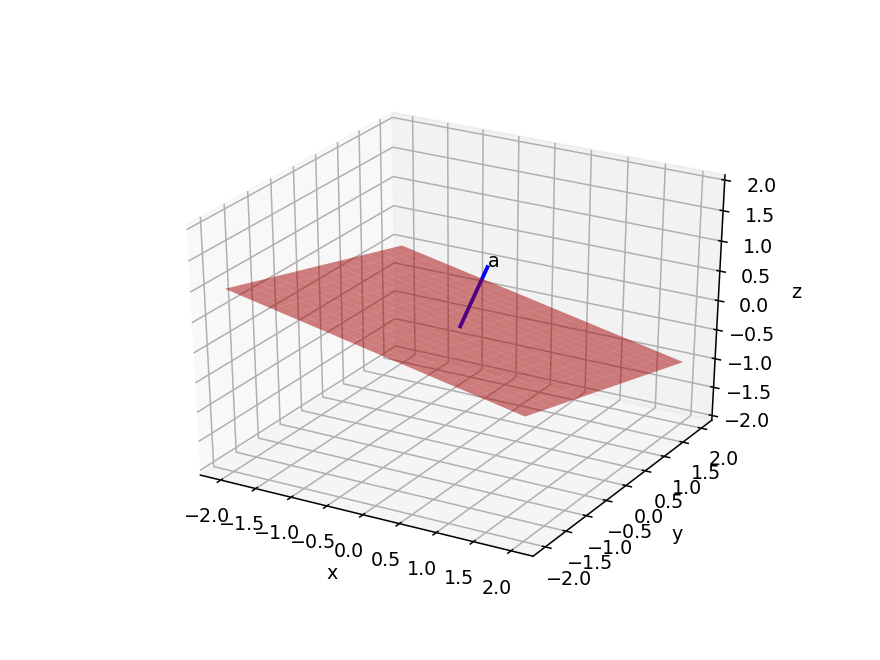

In [82]:
# plotting lines and planes
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

a = np.array([1,1,4])/np.sqrt(18)   # make a unit vector

x = np.linspace(-2,2,20)
y = np.linspace(-2,2,20)
X, Y = np.meshgrid(x, y)   # make an (X,Y) grid on a small square

Z = (-a[0]*X - a[1]*Y)/a[2]  # height of points on plane perpendicular to a

ax.plot3D([0, a[0]], [0, a[1]], [0, a[2]],'b',linewidth=2)   # plot the a vector
ax.text3D(a[0], a[1], a[2], 'a')                             # label the a vector
ax.plot_surface(X, Y, Z, alpha=0.5, color='r')              # plot the plane perp to a

ax.grid('on')
ax.set_zlim(-2,2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:vperp} A unit vector and its perpendicular plane. \end{myfig}

There is a third way of computing the product of two
vectors in $\maR^3$ that is especially important to studies of angular motion. The 
**cross product**  of $u$ and $v$ is written
$u\times v$ and defined as the matrix vector product


\begin{equation}\label{eq:Xdef}
  u\times v \equiv \ttX(u)v =
  \begin{pmatrix} 0 & -u_2 & u_1 \\
                  u_2 & 0 & -u_0 \\
                  -u_1 & u_0 & 0 \end{pmatrix}
  \begin{pmatrix} v_0 \\ v_1 \\ v_2 \end{pmatrix}
  = \begin{pmatrix} -u_2v_1 + u_1v_2 \\ u_2v_0-u_0v_2 \\ -u_1v_0+u_0v_1 
    \end{pmatrix}  
\end{equation}

The next two exercises develop the key properties of the cross product - as illustrated in Figure \ref{fig:crossp}.

\begin{exercise}\label{ex:CP0}
(a) Show that $u^T(u\times v)=0$ and $v^T(u\times v)=0$ and conclude that $u\times v$ is perpendicular to the plane containing $u$ and $v$.

(b) Confirm that $\ttX(u)^T=-\ttX(u)$ and that $\ttX(u)^2=uu^T-\|u\|^2I$.

(c) Use (b) to derive
$
  \|u\times v\|^2 = \|u\|^2\|v\|^2 - (u^Tv)^2.
$

(d) If $\theta=\angle(u,v)$ is the angle from $u$ to $v$ use (c) and (\ref{eq:CSE}) to show that
$
  \|u\times v\| = \|u\|\|v\||\sin\theta|.
$

(e) Use (d) and the figure below to conclude that 
$\|u\times v\|$
is the area (base times height) of the parallelogram with sides $u$ and $v$.

(f) Use (e) and the figure below to conclude that $|w^T(u\times v)|$
is the volume (area of base times height) of the parallelepiped with 
sides $u,\ v$ and $w$. Hint: Let $u$ and $v$ define the base. Then
$u\times v$ is parallel to the height vector obtained by drawing
a perpendicular from $w$ to the base.

(g) Based on our work in the previous notebook we note that this parallelepiped is the image of the unit cube by the transformation

\begin{equation*}
 A = [u, v, w] = \begin{bmatrix} u_0 & v_0 & w_0 \\ u_1 & v_1 & w_1 \\ u_2 & v_2 & w_2 \end{bmatrix}
\end{equation*}

As this image has volume $|w^T(u\times v)|$, if the determinant indeed measures volume change (as it did in the plane) then $\det(A)=w^T(u\times v)$ should tell us how to compute the determinant of $A$. Please confirm that $u\times v$ is a 
sequence of planar determinants and that $w^T(u\times v)$ is precisely the **column expansion** down column 2;

\begin{equation} \label{eq:det3}
  \det(A) = \sum_{i=0}^2 A[i,2](-1)^i\det(A[!i,!2])
\end{equation}

where $A[!i,!2]$ is the 2-by-2 submatrix of $A$ obtained by *excluding* row $i$ and column $2$.

\end{exercise}

Your solution here.

\begin{exercise}\label{ex:cpdet3}
Given

\begin{equation*}
 u = \begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}, \hskip 0.25in
 v = \begin{bmatrix} 2 \\ 1 \\ 1 \end{bmatrix}, \hskip 0.25in
 w = \begin{bmatrix} 1 \\ 1 \\ 2 \end{bmatrix}
\end{equation*}

(a) Compute $u\times v$ by hand, via (\ref{eq:Xdef}), and check your work in python using np.cross(u,v)

(b) Compute $\det(A)$ by hand, via (\ref{eq:det3}), and check your work in python using np.linalg.det(A)


\end{exercise}

Your solution here.

<IPython.core.display.Javascript object>


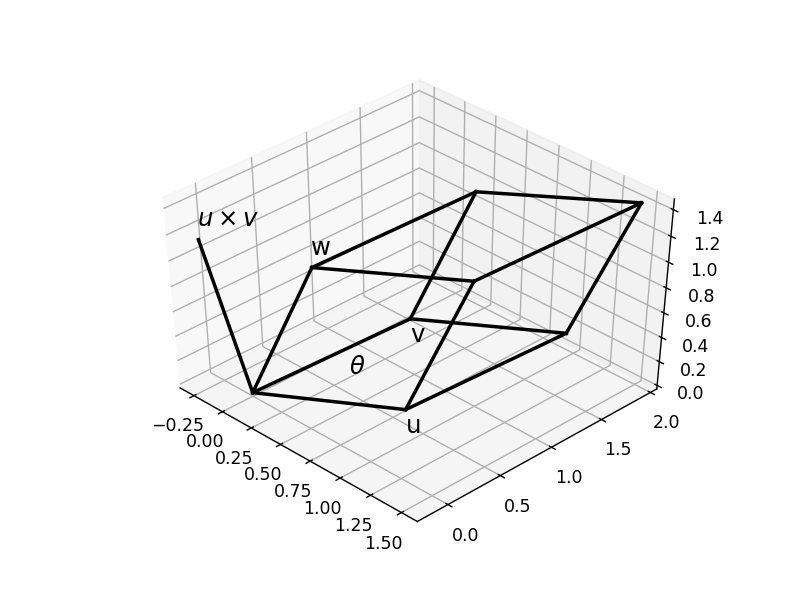

In [3]:
# cross product illustration
%matplotlib notebook
import numpy as np                 # import math functions
import matplotlib.pyplot as plt    # import plot functions

fig = plt.figure(' ')
ax = plt.axes(projection="3d")

x = np.array([1,1/3,1/4])

y = np.array([1/4,5/4,1/5])

xcy = np.cross(x.T,y.T);

z = x + y;

ax.plot3D([0, x[0]],[0, x[1]],[0, x[2]],'k',linewidth=2)

ax.text3D(x[0],x[1],x[2]-.2,'u',fontsize=14)
ax.text3D(y[0],y[1],y[2]-.2,'v',fontsize=14)
ax.text3D(y[0],y[1]-.6,y[2]-.2,'$\\theta$',fontsize=14)

ax.plot3D([0, y[0]],[0, y[1]],[0, y[2]],'k',linewidth=2)
ax.plot3D([y[0], z[0]],[y[1], z[1]],[y[2], z[2]],'k',linewidth=2)
ax.plot3D([x[0], z[0]],[x[1], z[1]],[x[2], z[2]],'k',linewidth=2)

ax.plot3D([0, xcy[0]],[0, xcy[1]],[0, xcy[2]],'k',linewidth=2)
ax.text3D(xcy[0],xcy[1],xcy[2]+.1,'$u\\times v$',fontsize=14)

w = np.array([1/4, 1/3, 1])
ax.plot3D([0, w[0]],[0, w[1]],[0, w[2]],'k',linewidth=2)
ax.text3D(w[0],w[1],w[2]+.1,'w',fontsize=14)
ax.plot3D([x[0], x[0]+w[0]],[x[1], x[1]+w[1]],[x[2], x[2]+w[2]],'k',linewidth=2)
ax.plot3D([y[0], y[0]+w[0]],[y[1], y[1]+w[1]],[y[2], y[2]+w[2]],'k',linewidth=2)
ax.plot3D([z[0], z[0]+w[0]],[z[1], z[1]+w[1]],[z[2], z[2]+w[2]],'k',linewidth=2)
ax.plot3D([w[0], x[0]+w[0]],[w[1], x[1]+w[1]],[w[2], x[2]+w[2]],'k',linewidth=2)
ax.plot3D([w[0], y[0]+w[0]],[w[1], y[1]+w[1]],[w[2], y[2]+w[2]],'k',linewidth=2)
ax.plot3D([y[0]+w[0], z[0]+w[0]],[y[1]+w[1], z[1]+w[1]],[y[2]+w[2], z[2]+w[2]],'k',linewidth=2)
ax.plot3D([x[0]+w[0], z[0]+w[0]],[x[1]+w[1], z[1]+w[1]],[x[2]+w[2], z[2]+w[2]],'k',linewidth=2);

\begin{myfig}\label{fig:crossp} The geometry of the cross product. Here $\theta=\angle(u,v)$ and we note that $u\times v$ is perpendicular to the plane defined by $u$ and $v$. The actual *direction* of $u\times v$ is uniquely specified by the **right hand rule:** If, on your right hand, $u$ aligns with your index finger, $v$ with your middle finger, then $u\times v$ will align with your thumb. The volume of the parallelpiped is the determinant of the matrix with columns $\{u,v,w\}$. \end{myfig}

## Rotations

To prepare for rotations in space we consider the planar rotations of the previous notebook from a more analytical viewpoint.  In particular, with reference to Figure \ref{fig:rot2}, we observe that

\begin{equation} \label{eq:xycirc}
  x_0(\theta) = r\cos(\theta), \\
  x_1(\theta) = r\sin(\theta)
\end{equation}

traces out a circle of radius $r$ in the $(x_0,x_1)$ plane as $\theta$ travels from 0 to $2\pi$. On differentiating this pair with respect to $\theta$ we arrive at the tangent vector with components

\begin{equation} \label{eq:circtan}
  x'_0(\theta) = -r\sin(\theta), \\
  x'_1(\theta) = r\cos(\theta)
\end{equation}

This vector is most naturally illustrated when translated to the point at which it is tangent.

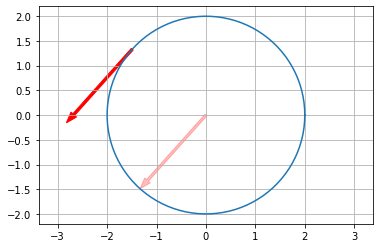

In [3]:
# planar rotation with tangent
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi,100)
r = 2

x0 = r*np.cos(theta)
x1 = r*np.sin(theta)
plt.plot(x0, x1)

dx0 = -r*np.sin(theta)
dx1 = r*np.cos(theta)

m = np.random.randint(100)

plt.arrow(x0[m], x1[m], dx0[m], dx1[m], width=0.05, color='r', length_includes_head=True)
plt.arrow(0, 0, dx0[m], dx1[m], width=0.05, color='r', alpha=0.25, length_includes_head=True)
plt.grid('on')
plt.axis('equal');

\begin{myfig}\label{fig:rot2} At a random point on the blue circle we graph the tangent vector, $x'$, in light red, and it's parallel translate in dark red. Rerun to see new tangent.\end{myfig}

\begin{exercise}\label{ex:gtan}
Please confirm that $\|x(\theta)\|=r$, and $\|x'(\theta)\|=r$ and $x^T(\theta)x'(\theta)=0$ for each $0\le\theta <2\pi$.
\end{exercise}

We next note that the elements of $x'$ are the transformed elements of $x$, i.e.,

\begin{equation}\label{eq:rot2b}
  x'(\theta) = Sx(\theta), \where S = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}
\end{equation}

We solve this differential equation by analogy with the scalar case. In particular, as the solution to $y'(t)=5y(t)$ is $y(t)=\exp(5t)y(0)$, we expect the solution of (\ref{eq:rot2b}) to be

\begin{equation}\label{eq:rot2c}
  x(\theta) = \exp(\theta S)x(0)
\end{equation}

where

\begin{equation}\label{eq:TayExp}
   \exp(\theta S) = I + \theta S + (\theta S)^2/2! + (\theta S)^3/3! + (\theta S)^4/4! + (\theta S)^5/5! + \cdots
\end{equation}

where $I$ is the 2-by-2 identity matrix. This looks complicated, until you realize that $S$ has very simple powers.

\begin{exercise}\label{ex:S2pow}
Please show that
\begin{equation*}
  S^{2m-1} = (-1)^{m+1}S  \and S^{2m} = (-1)^mI \hskip 0.25in m=1,2,\ldots
\end{equation*}
and deduce that
\begin{equation*}
  \eqalign{
   \exp(\theta S) &= I + \theta S - \theta^2 I/2! - \theta^3 S/3! + \theta^4 I/4! + \theta^5 S/5! + \cdots \cr
      &= (1 - \theta^2/2! + \theta^4/4! - \cdots)I + (\theta - \theta^3/3! + \theta^5/5! - \cdots)S \cr
      &= \cos(\theta)I + \sin(\theta)S \cr
      &= K(\theta) \hskip{0.25in}\hbox{from our previous notebook.}\cr}
\end{equation*}
\end{exercise}

To **recap**, our return to planar rotations we have found that 

\begin{equation}\label{eq:expS2}
  \boxed{K(\theta)=\exp(\theta S)}
\end{equation}

where $S$ is the matrix that transforms points to tangents along the circle of rotation. This will be our clue to exploring rotations in space. Given a unit vector $a\in\maR^3$ and vector $x\in\maR^3$ we illustrate in Figure \ref{fig:3drot} the counterclockwise rotation of $x$ about $a$ by angle $\theta$, together with its translated tangent vector.

<IPython.core.display.Javascript object>


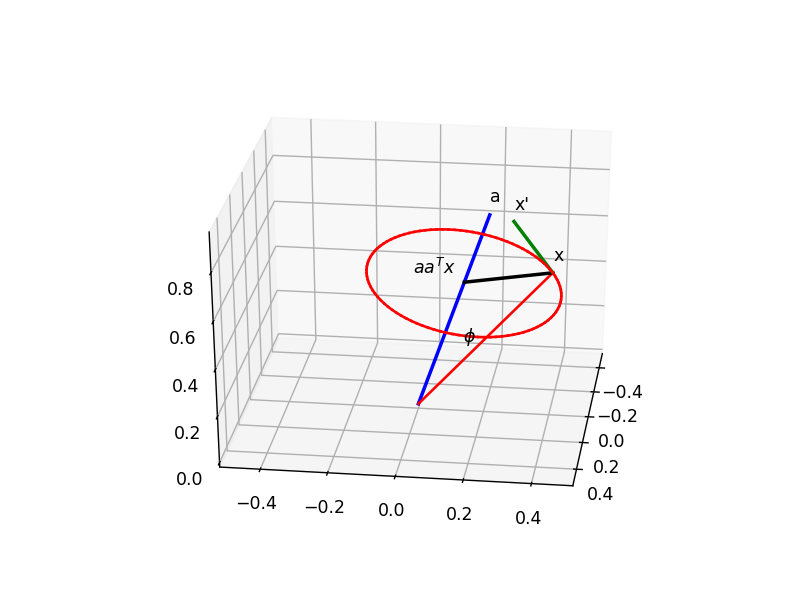

In [59]:
# an illustration of rotation about an axis
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work
ax.view_init(elev = 14, azim = 18)

a = np.array([1,1,4])/np.sqrt(18)   # make a unit vector
A = np.outer(a,a)
I = np.eye(3)
X = np.array([[0, -a[2], a[1]],[a[2], 0, -a[0]], [-a[1], a[0], 0]])   # the cross product matrix

ax.plot3D([0, a[0]], [0, a[1]], [0, a[2]],'b',linewidth=2)   # plot the a vector
ax.text3D(a[0], a[1], a[2]+0.05, 'a')                             # label the a vector

x = np.array([0,2,3])/5
ax.plot3D([0, x[0]], [0, x[1]], [0, x[2]],'r')   # plot the x vector
ax.text3D(x[0], x[1], x[2]+.05, 'x')                             # label the x vector

Ax = A@x
ax.plot3D([Ax[0], x[0]], [Ax[1], x[1]], [Ax[2], x[2]], 'k',linewidth=2)   # plot the A*x vector
ax.text3D(Ax[0], Ax[1]-.15, Ax[2]+0.025, '$aa^Tx$')   # label the A*x vector

dx = np.cross(a, x)
ax.plot3D([x[0], x[0]+dx[0]], [x[1], x[1]+dx[1]], [x[2], x[2]+dx[2]], 'g',linewidth=2)   # plot the dx vector
#ax.arrow3D(x[0], x[1], x[2], dx[0], dx[1], dx[2], width=0.05, color='g', length_includes_head=True)   # plot the dx vector
ax.text3D(x[0]+dx[0], x[1]+dx[1], x[2]+dx[2]+0.05, "x'")   # label the dx vector

p = (Ax + x)/4
ax.text3D(p[0], p[1], p[2], '$\phi$')   # label phi

Theta = np.linspace(0,2*np.pi,100)

y = x  # temp storage

for theta in Theta:
    K = A + np.sin(theta)*X + np.cos(theta)*(I-A)    # the rotation matrix
    newy = K@x
    ax.plot3D([y[0], newy[0]], [y[1], newy[1]], [y[2], newy[2]],'r')   # connect old to new
    y = newy

ax.grid('on')
ax.set_xlim(-.5, .5)
ax.set_ylim(-.5, .5);

\begin{myfig}\label{fig:3drot} An axis defined by a blue unit vector, $a$. We choose a red vector $x$ that makes the angle $\phi$ with $a$. We rotate $x$ about $a$ and trace out the red circle centered at $aa^Tx$ (the projection of $x$ onto $a$).
At $x$ we also plot the black normal (radial) vector to the circle and the green tangent vector, $x'$. \end{myfig}

We learn from this figure that the tangent vector, $x'$, is perpendicular to the plane spanned by $a$ and $x$, obeys the right-hand-rule, and that its length is $\|x\|\sin(\phi)$. As such, the tangent vector at $x$ is the cross product of $a$ and $x$. That is,

\begin{equation*}
  x'(\theta) = a\times x = X(a)x
\end{equation*}

and **so $X(a)$ is the matrix that transforms points to tangents during a rotation.** Based on (\ref{eq:expS2}) we therefore expect the associated rotation matrix to be

\begin{equation*}
  K(a,\theta) \equiv \exp(\theta X(a)) = I + \theta X(a) + (\theta X(a))^2/2 + (\theta X(a))^3/3! + (\theta X(a))^4/4! + \cdots
\end{equation*}

Now, thanks to Exercise \ref{ex:CP0} we know that powers of $X(a)$ divide neatly between even and odd that in turn reveal $\sin(\theta)$ and $\cos(\theta)$.

\begin{exercise}\label{ex:expXa}
Please show that
\begin{equation*}
  X(a)^{2m-1} = (-1)^{m+1}X(a) \and X(a)^{2m} = (-1)^m(I - aa^T) \hskip 0.25in m=1,2,\ldots
\end{equation*}
and so
\begin{equation*}
  K(a,\theta) = \exp(\theta X(a)) 
  = I + \sin(\theta)X(a) + (\cos(\theta)-1)(I-aa^T) 
  = aa^T + \sin(\theta)X(a) + \cos(\theta)(I-aa^T)
\end{equation*}
\end{exercise}

This deserves a box. The counterclockwise rotation by $\theta$ about the unit-length axis $a\in\maR^3$ is

\begin{equation}\label{eq:Kat}
  \boxed{K(a,\theta) = aa^T + \sin(\theta)X(a) + \cos(\theta)(I-aa^T)}
\end{equation}


Let us produce these matrices when $a$ is one of the coordinate axes

\begin{equation}\label{eq:eCart}
 e_x = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \hskip 0.25in
 e_y = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \hskip 0.25in
 e_z = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{equation}

\begin{exercise}\label{ex:Rot3euc}
Please confirm that

\begin{equation}\label{eq:Kax}
 K(e_x,\theta) = \begin{bmatrix} 
       1 & 0 & 0 \\ 0 & \cos(\theta) & -\sin(\theta) \\  0 & \sin(\theta) & \cos(\theta)\end{bmatrix}, \hskip 0.25in
 K(e_y,\theta) = \begin{bmatrix} 
         \cos(\theta) & 0 & \sin(\theta) \\  0 & 1 & 0 \\ -\sin(\theta) & 0 & \cos(\theta)\end{bmatrix}, \hskip 0.25in
 K(e_z,\theta) = \begin{bmatrix} 
       \cos(\theta) & -\sin(\theta) & 0 \\ \sin(\theta) & \cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}
\end{equation}

and in each case show that its determinant, via Equation \ref{eq:det3}, is 1 and its trace is $1+2\cos\theta$.

\end{exercise}

Your solution here.

These coordinate rotations, (\ref{eq:Kax}), indeed have the look of the planar rotations of our previous notebook. Let's now show that $K(a,\theta)$ indeed leaves $a$ unmolested, that its transpose reverses the rotation, that composite rotations correspond to sums of angles,
and that it preserves length (norm) and angle (with respect to $a$).


\begin{exercise}\label{ex:Rot3a}
Use Exercise (\ref{ex:CP0}) to conclude that 

(i) $K(a,\theta)a = a$

(ii) $K(a,\theta)^T = K(a,-\theta)$

(iii) $K(a,\theta)K(a,\phi)=K(a,\theta+\phi)$

(iv) $\|K(a,\theta)x\| = \|x\|$, for each $x\in\maR^3$ and $\theta\in(0,2\pi)$.

(v) $\angle(a,x)=\angle(a,K(a,\theta)x)$, for each $x\in\maR^3$ and $\theta\in(0,2\pi)$.
\end{exercise}

Your solution here.

We could "see" the trace of each coordinate rotation, (\ref{eq:Kax}), without trouble, and found it to be independent of direction. Using $\|a\|=1$ and that the trace of a sum is the sum of the traces please use (\ref{eq:Kat}) to

\begin{exercise}\label{ex:trKa} Show that $\tr(K(a,\theta))=1+2\cos(\theta)$
\end{exercise}

Your solution here.

Although we could also see that the determinant of each coordinate rotation, (\ref{eq:Kax}), was 1, the form of $K(a,\theta)$ as the sum (\ref{eq:Kat}), is not conducive to evaluation of the determinant. Recalling, from our previous notebook, that the determinant of a product is the product of determinants we now show  that $K(a,\alpha)$ can be written as a product of coordinate rotations. 

Returning to Figure \ref{fig:ascon} we write the axis, $a$, in spherical coordinates

\begin{equation}\label{eq:asc}
  a = \begin{bmatrix}\sin(\theta)\cos(\phi) \\ \sin(\theta)\sin(\phi) \\ \cos(\theta) \end{bmatrix}
\end{equation}

and reason that to achieve $K(a,\alpha$) we

\begin{itemize}
\item rotate $a$ onto $e_z$ (rotate $a$ around $e_z$ by $-\phi$, then rotate around $e_y$ by $-\theta$)
\item rotate around $e_z$ by $\alpha$
\item undo the initial transformation, i.e, rotate around $e_y$ by $\theta$, then rotate around $e_z$ by $\phi$.
\end{itemize}

In symbols, this reads; rotation about an axis $a$ of the form (\ref{eq:asc}) is achieved by

\begin{equation}\label{eq:K5}
  \boxed{K(a,\alpha) = K(e_z,\phi)K(e_y,\theta)K(e_z,\alpha)K(e_y,-\theta)K(e_z,-\phi)}
\end{equation}

That is, every rotation in space is the product of five coordinate rotations.

\begin{exercise}\label{ex:rot2way} With $\theta=\phi=\pi/4$ we find $a=[1/2,1/2,1/\sqrt 2]$. Compute $K(a,\alpha)$ via
(\ref{eq:Kat}) and (\ref{eq:K5}) and confirm their identity.
\end{exercise}

Your solution here.

Our next application of this tool will be to map one right-handed cartesian frame, $(e_x,e_y,e_z)$, to another, $(e_1,e_2,e_3)$. We illustrate these two frames in Figure \ref{fig:EulerAngles}.

<IPython.core.display.Javascript object>


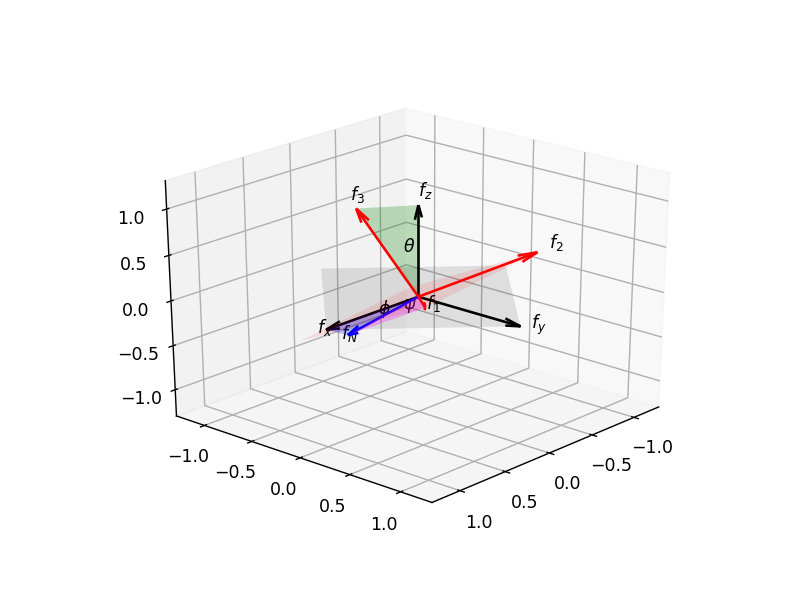

In [62]:
# transformation of frames
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

%matplotlib notebook

fig = plt.figure(' ')
ax = fig.gca(projection='3d')

fx = np.array([1,0,0])
fy = np.array([0,1,0])
fz = np.array([0,0,1])

F1 = ax.quiver([0,0,0],[0,0,0],[0,0,0],fx,fy,fz, colors='k', arrow_length_ratio=.15)

# create the e plane 
x = [fx[0], fy[0], -fx[0], -fy[0]]   
y = [fx[1], fy[1], -fx[1], -fy[1]]   
z = [fx[2], fy[2], -fx[2], -fy[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'k', alpha = 0.1))

tfx = 1.1*fx
ax.text3D(tfx[0], tfx[1], tfx[2], '$f_x$')
tfy = 1.1*fy
ax.text3D(tfy[0], tfy[1], tfy[2], '$f_y$')
tfz = 1.1*fz
ax.text3D(tfz[0], tfz[1], tfz[2], '$f_z$')

f1 = np.array([1,1,0.5])/np.sqrt(2.25)
f2 = np.array([-1,1,0.75])/np.sqrt(2+9/16)
f3 = np.cross(f1, f2)
f3 = f3 / np.linalg.norm(f3)

F2 = ax.quiver([0,0,0],[0,0,0],[0,0,0],
               [f1[0], f2[0], f3[0]],[f1[1], f2[1], f3[1]], [f1[2], f2[2], f3[2]], colors='r', arrow_length_ratio=.15)

# create the f plane 
x = [f1[0], f2[0], -f1[0], -f2[0]]   
y = [f1[1], f2[1], -f1[1], -f2[1]]   
z = [f1[2], f2[2], -f1[2], -f2[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor='r', alpha = 0.1))

tf1 = 1.1*f1
ax.text3D(tf1[0], tf1[1], tf1[2], '$f_1$')
tf2 = 1.1*f2
ax.text3D(tf2[0], tf2[1], tf2[2], '$f_2$')
tf3 = 1.1*f3
ax.text3D(tf3[0], tf3[1], tf3[2], '$f_3$')

fN = np.cross(fz, f3)
fN = fN / np.linalg.norm(fN)
F3 = ax.quiver(0,0,0,fN[0], fN[1], fN[2], colors='b', arrow_length_ratio=.15)
tfN = 1.1*fN
ax.text3D(tfN[0], tfN[1], tfN[2], '$f_N$')

# create the theta span
x = [0, f3[0], fz[0]]  
y = [0, f3[1], fz[1]]  
z = [0, f3[2], fz[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'g', alpha = 0.25))
f3z = (f3 + fz)/4
ax.text3D(f3z[0], f3z[1], f3z[2], '$\\theta$')

# create the phi span
x = [0, fx[0], fN[0]]  
y = [0, fx[1], fN[1]]  
z = [0, fx[2], fN[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = 'b', alpha = 0.25))
f3z = (fx + fN)/4
ax.text3D(f3z[0], f3z[1], f3z[2], '$\phi$')

# create the psi span
x = [0, f1[0], fN[0]]  
y = [0, f1[1], fN[1]]  
z = [0, f1[2], fN[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = [1,0,1], alpha = 0.25))
f3z = (f1 + fN)/4
ax.text3D(f3z[0], f3z[1], f3z[2], '$\psi$')

ax.set_xlim3d([-1.25, 1.25])
ax.set_ylim3d([-1.25, 1.25])
ax.set_zlim3d([-1.25, 1.25])
plt.show()

\begin{myfig}\label{fig:EulerAngles} Transformation of the given frame $(f_x, f_y, f_z)$ into the target frame $(f_1,f_2,f_3)$.
Please rotate and zoom to explore the three angles between the two frames. The black $(f_x,f_y)$ plane intersects the red $(f_1,f_2)$ plane along the blue
$f_N = f_z\times f_3/\Vert f_z\times f_3\Vert$ direction. We denote by $\phi$ the angle from $f_x$ to $f_N$ looking down $f_z$. We paint this span blue and note, as $f_x$ and $f_N$ lie in the black plane,  that

\begin{equation}\label{eq:EA1}
  f_N = K(f_z,\phi)f_x
\end{equation}

We next denote by $\theta$ the angle from $f_z$ to $f_3$ looking down $f_N$. We paint this span green and note that

\begin{equation}\label{eq:EA2}
  f_3 = K(f_N,\theta)f_z
\end{equation}

We finally denote by $\psi$ the angle from $f_N$ to $f_1$ looking down $f_3$. We paint this span purple and note, as $f_N$ and $f_1$ lie in the red plane, that

\begin{equation}\label{eq:EA3}
  f_1 = K(f_3,\psi)f_N
\end{equation}

\end{myfig}

We collect these individual rotations into the composite

\begin{equation}\label{eq:EATot}
  \cK \equiv K(f_3,\psi)K(f_N,\theta)K(f_z,\phi)
\end{equation}

and establish that $\cK$ indeed transforms $(f_x,f_y,f_z)$ to $(f_1,f_2,f_3)$.

\begin{exercise}\label{ex:EA0} (a) Please confirm that $\cK f_x=f_1$ and $\cK f_z = f_3$. 

(b) Please use $(AB)^T=B^TA^T$ and Exercise \ref{ex:Rot3a} to deduce that $\cK^T\cK = I$.

(c) Use (b) to show that  $\cK f_y$ is a unit vector perpendicular to **both** $f_1$ and $f_3$ and so can only be $f_2$ or $-f_2$. **FINISH WITH ORIENTATION PRESERVATION WHEN DET > 0**

\end{exercise}

Your solution here.

 ## Kinematics
 
The Programmable Universal Manipulation Arm (PUMA) of Figure \ref{fig:rob3} is a common 6-degree-of-freedom industrial robotic arm.

<IPython.core.display.Javascript object>


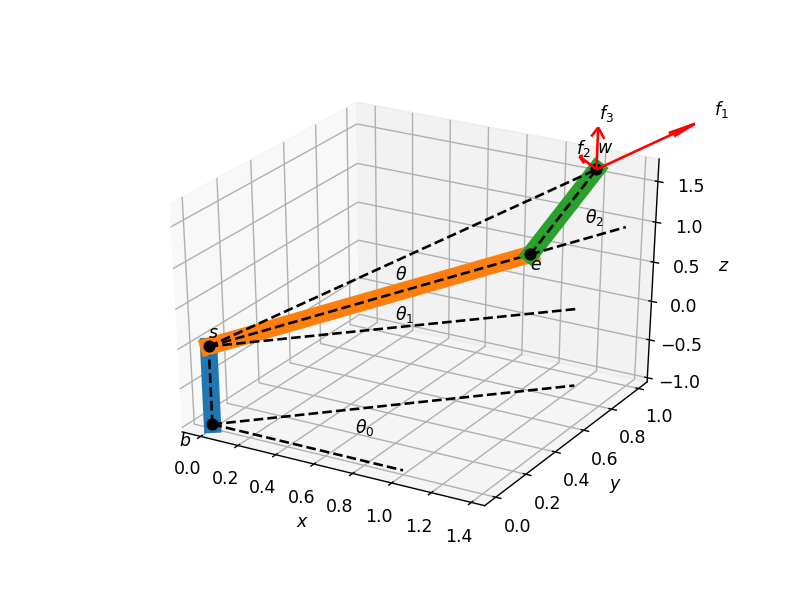

In [60]:
# 6R PUMA
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

theta0 = np.pi/5      # angles and link lengths
ell1 = 1.5
ell2 = 1
theta1 = np.pi/6
theta2 = np.pi/4

b = np.array([0,0,-1])   # base
s = np.array([0,0,0])    # shoulder

ax.plot3D([b[0],s[0]],[b[1],s[1]],[b[2],s[2]],linewidth=10)   # link 0, b to s
ax.plot3D([b[0],s[0]],[b[1],s[1]],[b[2],s[2]],'ko--')

e = np.array([ell1*np.cos(theta0)*np.cos(theta1), ell1*np.sin(theta0)*np.cos(theta1), 
              ell1*np.sin(theta1)])   # elbow

ax.plot3D([s[0],e[0]],[s[1],e[1]],[s[2],e[2]],linewidth=10)   # link 1, s to e
ax.plot3D([s[0],e[0]],[s[1],e[1]],[s[2],e[2]],'ko--')

w = e + np.array([ell2*np.cos(theta0)*np.cos(theta1+theta2), ell2*np.sin(theta0)*np.cos(theta1+theta2), 
                  ell2*np.sin(theta1+theta2)])   # wrist

ax.plot3D([e[0],w[0]],[e[1],w[1]],[e[2],w[2]],linewidth=10)   # link 2, e to w
ax.plot3D([e[0],w[0]],[e[1],w[1]],[e[2],w[2]],'ko--')

ax.plot3D([s[0],w[0]],[s[1],w[1]],[s[2],w[2]], 'k--')   # finish theta triangle

# paste a labeled frame at end
f1 = np.array([1,2,1])/np.sqrt(6)
f2 = np.array([-1,1,-1])/np.sqrt(3)
f3 = np.array([0,0,1])
F2 = ax.quiver([w[0],w[0],w[0]],[w[1],w[1],w[1]],[w[2],w[2],w[2]],
               [f1[0], f2[0], f3[0]],[f1[1], f2[1], f3[1]], [f1[2], f2[2], f3[2]], 
               length=0.5, colors='r', arrow_length_ratio=.25)
tf1 = 0.6*f1 + w
ax.text3D(tf1[0], tf1[1], tf1[2], '$f_1$')
tf2 = 0.6*f2 + w
ax.text3D(tf2[0], tf2[1], tf2[2], '$f_2$')
tf3 = 0.6*f3 + w
ax.text3D(tf3[0], tf3[1], tf3[2], '$f_3$')

ax.text3D(0, -.2, -1, '$b$')
ax.text3D(0, 0, 0.1, '$s$')
ax.text3D(e[0], e[1], e[2]-.2, '$e$')
ax.text3D(w[0], w[1], w[2]+.2, '$w$')

# add angle labels and helpful liness
ax.plot3D([b[0],b[0]+1], [b[1],b[1]],[b[2],b[2]],'k--')
ax.plot3D([b[0],ell1*np.cos(theta0)], [b[1],ell1*np.sin(theta0)],[b[2],b[2]],'k--')
ax.text3D(ell1*np.cos(theta0)/2, ell1*np.sin(theta0)/5, b[2],'$\\theta_0$')

ax.plot3D([s[0],ell1*np.cos(theta0)], [s[1],ell1*np.sin(theta0)],[s[2],s[2]],'k--')
ax.text3D(ell1*np.cos(theta0)/2, ell1*np.sin(theta0)/2, s[2] + 0.1,'$\\theta_1$')
ax.text3D(ell1*np.cos(theta0)/2, ell1*np.sin(theta0)/2, s[2] + 0.6,'$\\theta$')

Le = 1.3*e  # Long e
ax.plot3D([e[0],Le[0]], [e[1],Le[1]],[e[2],Le[2]],'k--')
ax.text3D(Le[0]*.9, Le[1]*.9, Le[2]*.9 + 0.2,'$\\theta_2$')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.grid('on');

\begin{myfig}\label{fig:rob3} A 6 degree-of-freedom PUMA robot. It swings by $\theta_0$ at its base, $b$, by $\theta_1$ at its shoulder, $s$, by $\theta_2$ at its elbow, $e$, and by an additional 3 degrees-of-freedom at it's wrist, $w$. The orange link has length $\ell_1$ and the green link has length $\ell_2$. \end{myfig}

In terms of the stated angles and known link lengths, the positions of the marked joints in Figure \ref{fig:rob3} are

\begin{equation}\label{eq:pumadef}
s = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}, \hskip 0.25in
e = \begin{pmatrix} \ell_1\cos(\theta_0)\cos(\theta_1)  \\ \ell_1\sin(\theta_0)\cos(\theta_1) \\ \ell_1\sin(\theta_1) \end{pmatrix}, \hskip 0.25in
w =  \begin{pmatrix} \ell_1\cos(\theta_0)\cos(\theta_1) + \ell_2\cos(\theta_0)\cos(\theta_1+\theta_2) \\ \ell_1\sin(\theta_0)\cos(\theta_1) + \ell_2\sin(\theta_0)\cos(\theta_1+\theta_2)\\ \ell_1\sin(\theta_1) + \ell_2\sin(\theta_1+\theta_2) \end{pmatrix}
\end{equation}

The **inverse problem** of moving from a known configuration, 
$\{\ov\theta_0,\ov\theta_1,\ov\theta_2,\ov f_1,\ov f_2, \ov f_3\}$, to a target configuration, $\{w,f_1, f_2, f_3\}$
is solved in three steps.

In the **first** step we recognize that links 1 and 2 lie in a plane and so we may determine the intermediate angle $\theta$ as in our inverse solution of the planar robot arm,

\begin{equation}\label{eq:ct}
  \cos(\theta) = \frac{\ell_3^2+\ell_1^2-\ell_2^2}{2\ell_1\ell_3}
\end{equation}

where $\ell_3=\|w\|$ is the distance from shoulder to wrist. With $\theta$ in hand it is a simple matter to deduce the shoulder and elbow angles, $\theta_1$ and $\theta_2$, from Figure \ref{fig:rob3} via the Law of Cosines. We then rotate the
shoulder by $\theta_1-\ov\theta_1$ and the elbow by $\theta_2-\ov\theta_2$. This action rotates the given wrist frame,
$(\ov f_1,\ov f_2, \ov f_3)$ by $\delta\equiv (\theta_1+\theta_2)-(\ov\theta_1+\ov\theta_2)$ about the axis, $a$, perpendicular to the shoulder-elbow plane. Please confirm that this axis is

\begin{equation}\label{eq:InK1}
  a = \begin{pmatrix} \sin(\ov\theta_0) \\ -\cos(\ov\theta_0) \\ 0 \end{pmatrix}
\end{equation}

As such, the wrist frame becomes $(K(a,\delta)\ov f_1, K(a,\delta)\ov f_2, K(a,\delta)\ov f_3)$

In the **second**, we find the base angle $\theta_0$ by taking the ratio of the first two components in $w$. In particular

\begin{equation}\label{eq:w3a}
  \frac{w_1}{w_0} = \tan(\theta_0)
\end{equation}

We then rotate the base by $\delta_0\equiv \theta_0-\ov\theta_0$ about the $z$-axis. This places the wrist at the desired $w$ and its frame at

\begin{equation}\label{eq:wfra2}
  (f_x,f_y, f_z) \equiv (K(e_z,\delta_0)K(a,\delta)\ov f_1, K(e_z,\delta_0)K(a,\delta)\ov f_2, K(e_z,\delta_0)K(a,\delta)\ov f_3)
\end{equation}

For the **third** and final step we  use the composite rotation, $\cK$, of (\ref{eq:EATot}) to map $(f_x,f_y,f_z)$ to the target wrist frame, $(f_1,f_2,f_3)$.

\begin{exercise}\label{ex:rob3} Implement these three steps, in code, in moving the PUMA from $\\{0,0,0,e_x,e_y,e_z\\}$ to 
$\\{w,-e_x,e_y,-e_z\\}$ where

\begin{equation}\label{eq:tw}
   w = \begin{pmatrix} 1/2 \\ 1/2 \\ 2 \end{pmatrix}
\end{equation}

assuming $\ell_1 = 1.5$ and $\ell_2 = 1$.

(a) Find $\theta, \theta_1, \theta_2$, and the rotation matrix $K(a,\delta)$.

(b) Find $\theta_0$ and the rotation matrix $K(e_z,\delta_0)$.

(c) Find the composite rotation, $\cK$, that brings the wrist frame to $(-e_x,e_y,-e_z)$.

(d) Confirm your calculations by graphing your results.

\end{exercise}


In [61]:
# Your solution here.

## The Projective Plane

Overview

### The Classical Setting

We start with the **classical** set-up.

We place the (red) scene on the plane $z=z_0$, and the (blue) canvas on the plane $x=x_0$, and place the painter's (green) eye at the origin, $[0,0,0]$
and a pair of parallel (black) railroad tracks in our scene at $[x,\pm 1,z_0]$.

We compute the projection of the positive track onto the canvas. Each point from the eye to scene lies on the line

\begin{equation}\label{eq:proj0}
  t[x,y,z_0]
\end{equation}

This line hits the canvas when $tx=x_0$, i.e., when $t=x_0/x$, and so hits the canvas at

\begin{equation}\label{eq:projt}
    c = (x_0/x)[x, y, z_0]
\end{equation}

<IPython.core.display.Javascript object>


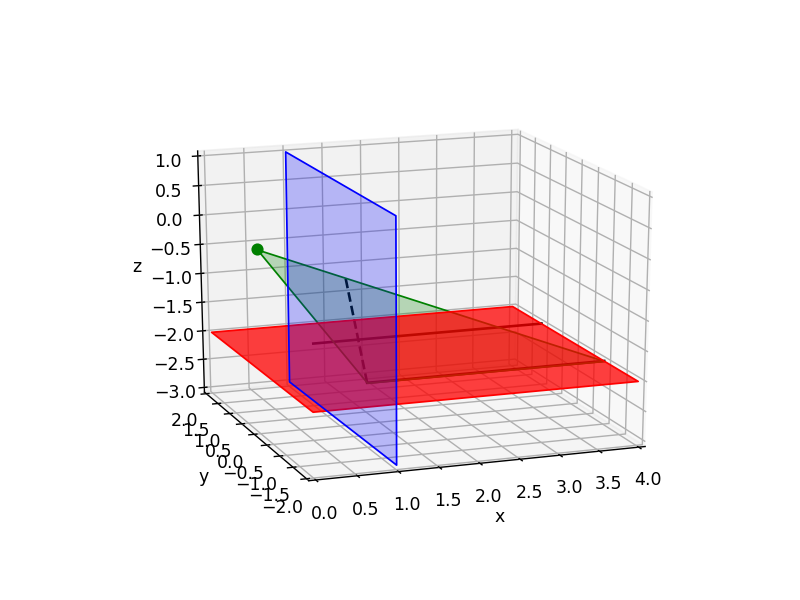

In [12]:
# painter perspective
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev = 18, azim = -110)

z0 = -2
# create the scene plane 
x = [0, 4, 4, 0]
y = [-2, -2, 2, 2]
z = [z0, z0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'r', alpha = 0.75))

x0 = 1
# create the canvas plane 
x = [x0, x0, x0, x0]
y = [-2, -2, 2, 2]
z = [z0-1, z0+3, z0+3, z0-1]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'b', alpha = 0.25))

ax.plot([x0, 4], [-1, -1], [z0, z0], 'k')   # right track
ax.plot([x0, 4], [1, 1], [z0, z0], 'k')      # left track

ax.plot([0], [0], [0], 'go')   # the painter's eye
#ax.plot([0, x0], [0, 0], [0, 0], 'g')   # eye into picture

# create plane through eye and right track
x = [0, x0, 4]
y = [0, -1, -1]
z = [0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'g', alpha = 0.25))

ax.plot([x0, x0], [-1, -x0/4], [z0, x0*z0/4], 'k--')   # right track projected 

ax.set_xlim(0, 4)
ax.set_ylim(-2, 2)
ax.set_zlim(z0-1, z0+3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:persp1} The black line in the red scene is projected onto the dashed black line on the blue canvas by following straight lines from the track to the painter's eye. Please run and rotate to explore the interplay of point, line, and plane. \end{myfig}

We next shift our perspective from painter to camera. In this case the canvas is the image plane behind the lens, as illustrated below.

<IPython.core.display.Javascript object>


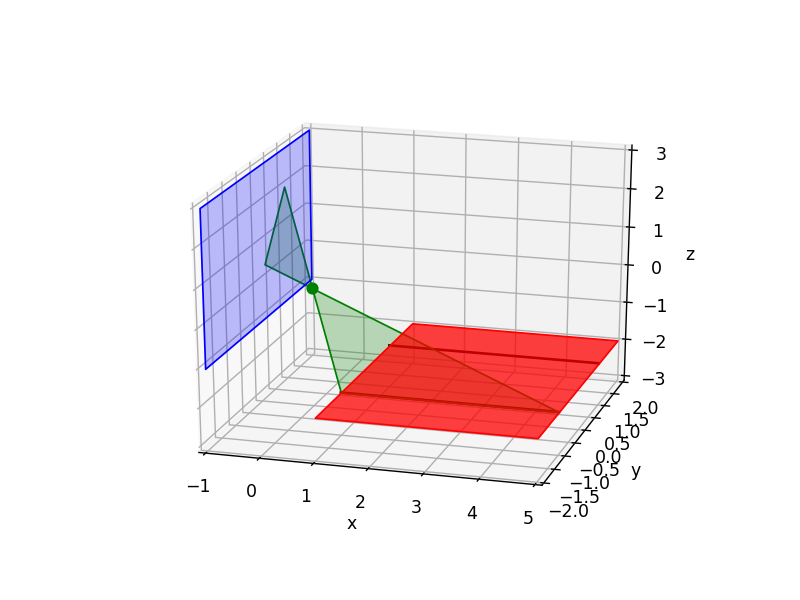

In [63]:
# camera perspective
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev = 18, azim = -110)

z0 = -2
# create the scene plane 
x = [0+1, 4+1, 4+1, 0+1]
y = [-2, -2, 2, 2]
z = [z0, z0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'r', alpha = 0.75))

x0 = -1
# create the camera plane 
x = [x0, x0, x0, x0]
y = [-2, -2, 2, 2]
z = [z0-1+2, z0+3+2, z0+3+2, z0-1+2]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'b', alpha = 0.25))

ax.plot([1, 5], [-1, -1], [z0, z0], 'k')   # right track
ax.plot([1, 5], [1, 1], [z0, z0], 'k')      # left track

ax.plot([0], [0], [0], 'go')   # the camera lens

# create bowtie through eye and right track onto image plane
x = [0, 5, 1]
y = [0, -1, -1]
z = [0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'g', alpha = 0.25))
x = [0, x0, x0]
y = [0, -x0, -x0/5]
z = [0, z0*x0, z0*x0/5]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'g', alpha = 0.25))

ax.set_xlim(x0, 5)
ax.set_ylim(-2, 2)
ax.set_zlim(z0-1, z0+3+2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:persp2} The black line in the red scene is projected onto the blue image plane by following straight lines from the track therough the camera's lens. Please run and rotate to explore the interplay of point, line, and plane. Do you see that the track is reflected in both the $y$ and $z$ directions in comparison with our previous figure? \end{myfig}

\begin{exercise}\label{ex:persp}
Modify the last two codes cells to add the green triangles associated with the projection of the other track.
\end{exercise}

### General Central Projections

We now consider the Central Projection (Fig. 70, page 168, Courant and Robbins) of the plane $\pi$ on to the plane $\pi'$ using the representations

$$
  \pi = \{p\in\maR^3:n^Tp = c\} = \{xa + yb + t: x\in\maR,\ y\in\maR\} \\
  \pi' = \{p'\in\maR^3:n'^Tp' = c'\} = \{ua' + vb' + t': u\in\maR,\ v\in\maR\}
$$

Now as the projection of $p$ is a point $p'$ on the line through $p$ it follows that

$$
  p' = \la p \implies c' = n'^Tp' = \la n'^Tp \implies \la = \frac{c'}{n'^Tp}
$$

that is,

$$
  p' = \frac{c'}{n'^Tp}p
$$

if we now invoke the basis representation this reads

$$
  ua' + vb' + t' = \frac{c'(xa + yb + t)}{xa^Tn' + yb^Tn' + t^Tn'}
$$

now taking the inner product of each side with $a'$ we find

$$
  u+a'^Tt' = \frac{c'(xa^Ta' + yb^Ta' + t^Ta')}{xa^Tn' + yb^Tn' + t^Tn'}
$$

and so

$$
  u = \frac{h_{0,0} x + h_{0,1} y + h_{0,2}}{h_{2,0} x + h_{2,1} y + h_{2,2}}
$$

and similarly

$$
  v = \frac{h_{1,0} x + h_{1,1} y + h_{1,2}}{h_{2,0} x + h_{2,1} y + h_{2,2}}
$$

that is, $(u,v)$ is a fractional linear transformation of $(x,y)$.

Equivalently,

\begin{equation}\label{eq:projH}
  \begin{pmatrix} u \\ v \\ w \end{pmatrix} 
   = \begin{pmatrix} h_{0,0} & h_{0,1} & h_{0,2} \\ h_{1,0} & h_{1,1} & h_{1,2} \\ h_{2,0} & h_{2,1} & h_{2,2} \end{pmatrix} \begin{pmatrix} x \\ y \\ 1 \end{pmatrix} = \begin{pmatrix} u/w \\ v/w \\ 1 \end{pmatrix}
\end{equation}



### Correcting the Camera

Need a more interesting scene...

We construct a Projective Transformation of the square

\begin{equation}\label{eq:sq0}
   (x_1,y_1) = (0,0) \\
   (x_2,y_2) = (1,0) \\
   (x_3,y_3) = (1,1) \\
   (x_4,y_4) = (0,1)
\end{equation}

to the perspectivized

\begin{equation}\label{eq:sq1}
   (x'_1,y'_1) = (0,0) \\
   (x'_2,y'_2) = (11/10,1/10) \\
   (x'_3,y'_3) = (11/10,9/10) \\
   (x'_4,y'_4) = (0,1)
\end{equation}

using $p' = Hp$ as above brings

\begin{equation}\label{eq:ptrans}
  x'_i(h_{31}x_i+h_{32}y_i+h_{33}) = h_{11}x_i+h_{12}y_i + h_{13} \\
  y'_i(h_{31}x_i+h_{32}y_i+h_{33}) = h_{21}x_i+h_{22}y_i + h_{23}
\end{equation}

If we stack these 4 sets of 2 we find a system for $H$

\begin{equation}\label{eq:H0}
 0 = h_{13} \\
 0 = h_{23} \\
 (11/10)(h_{31}+h_{33}) = h_{11}+h_{13} = h_{11}\\
 (1/10)(h_{31}+h_{33}) = h_{21}+h_{23} = h_{21} \\
 (11/10)(h_{31}+h_{32}+h_{33}) = h_{11}+h_{12} \\
 (9/10)(h_{31}+h_{32}+h_{33}) = h_{21}+h_{22} \\
 0 = h_{12} \\
 h_{32}+h_{33} = h_{22}
\end{equation}

or

\begin{equation}\label{eq:H1}
 (11/10)(h_{31}+h_{33}) =  h_{11}\\
 (1/10)(h_{31}+h_{33}) =  h_{21} \\
 (11/10)(h_{31}+h_{32}+h_{33}) = h_{11} \\
 (9/10)(h_{31}+h_{32}+h_{33}) = h_{21}+h_{22} \\
 h_{32}+h_{33} = h_{22}
\end{equation}

or

\begin{equation}\label{eq:HMAT}
\begin{pmatrix} -1 & 0 & 0 & 11/10 & 0 & 11/10 \\
0 & -1 & 0 & 1/10 & 0 & 1/10 \\
-1 & 0 & 0 & 11/10 & 11/10 & 11/10 \\
0 & -1 & -1 & 9/10 & 9/10 & 9/10 \\
0 & 0 & -1 & 0 & 1 & 1 \end{pmatrix}
\begin{pmatrix} h_{11} \\ h_{21} \\ h_{22} \\ h_{31} \\ h_{32} \\ h_{33} 
\end{pmatrix} =
\begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 
\end{pmatrix}
\end{equation}

upon row reduction we arrive at


\begin{equation}\label{eq:Hred}
\begin{pmatrix} -1 & 0 & 0 & 11/10 & 0 & 11/10 \\
0 & -1 & 0 & 1/10 & 0 & 1/10 \\
0 & 0 & 0 & 0 & 11/10 & 0 \\
0 & 0 & -1 & 8/10 & 9/10 & 8/10 \\
0 & 0 & 0 & -8/10 & 1/10 & 2/10 \end{pmatrix}
\end{equation}

On computing its null space we find

\begin{equation}\label{eq:Hfin}
H = \begin{pmatrix} 11 & 0 & 0 \\ 1 & 8 & 0 \\ 2 & 0 & 8 \end{pmatrix}
\end{equation}

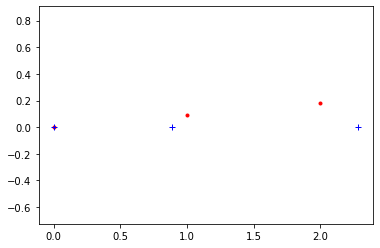

In [14]:
# now use it
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

H = np.array([[11,0,0],[1,8,0],[2,0,8]])
Hi = np.linalg.inv(H)

for x in range(3):
    y = x/11
    plt.plot(x,y,'r.')
    q = Hi@np.array([x,y,1])
    plt.plot(q[0]/q[2], q[1]/q[2], 'b+-')
        
plt.axis('equal');

See <a href="http://www.ams.org/publicoutreach/feature-column/fc-2013-03">Austin</a> for a more geometric approach.